# Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
def derivative(x,y,z,a,b,c):
    xprime = -1 * (y + z)
    yprime = x + a*y
    zprime = b + z * (x - c)
    return np.array([xprime, yprime, zprime])

# time step with euler's method
# assumes state as a np.array
def time_step(state, parameters, dt):
    change = derivative(state[0], state[1], state[2], 
                        parameters[0], parameters[1], parameters[2])
    #print(change)
    state += dt * change
    #print(state)
    return state

In [3]:
# parameters in the roessler attractor
def make_plot(c, T=30, dt=.03):
    a = .2
    b = .2
    #c = 10 # np.linspace(0,2,100)
    parameters = [a,b,c]

    # initial state
    x0 = 1
    y0 = 1
    z0 = 1
    initial_state = np.array([x0, y0, z0])

    # parameters for integration
    steps = int(np.floor(T / dt))

    # np.array storing time evoultion indexed by [time, coordinate]
    time_evolution = np.zeros((steps, 3))
    time_evolution[0,:] = initial_state

    for i in range(steps - 1):
        time_evolution[i+1, :] = time_step(time_evolution[i,:], parameters, dt)

    # plotting
    # 3D Plott to see overall time evolution
    time = np.linspace(0,steps,steps)
    x = time_evolution[:,0]
    y = time_evolution[:,1]
    z = time_evolution[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x,y, z, c=time)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.savefig('build/Exercise3-' + str(c) + '-3d.pdf')
    
    # 2D Plot with X-Z plane to see fix point
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.scatter(x, z, c=time)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    
    plt.savefig('build/Exercise3-' + str(c) + '-2d-x-z.pdf')
    
    # 2D Plot with y(t) to see trajectory of it
    peaks = signal.find_peaks(y)
    peak_indices = peaks[0]
    #print(peak_indices)
    
    fig = plt.figure()
    ax = fig.add_subplot()

    #ax.plot(time * dt, x, label=r'$x(t)$')#, marker='+')
    ax.plot(time * dt, y, label=r'$y(t)$')#, marker='+')
    #ax.plot(time * dt, z, label=r'$z(t)$')#, marker='+')
    ax.scatter(time[peak_indices] * dt, y[peak_indices], 
               marker='+',
               color='r',
               label='Peaks')

    
    #ax.set_yscale('log')
    ax.set_xlabel(r'$t$')
    ax.legend()
    
    plt.savefig('build/Exercise3-' + str(c) + '-2d-t-y.pdf')

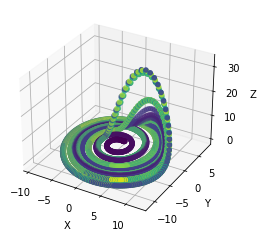

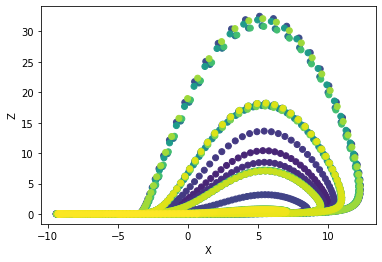

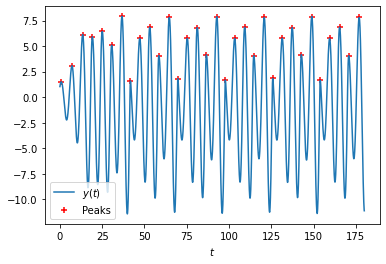

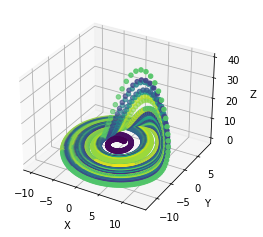

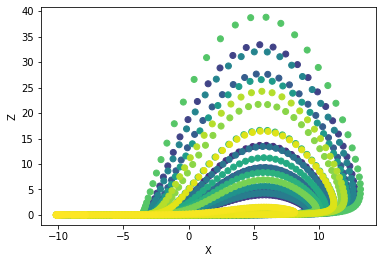

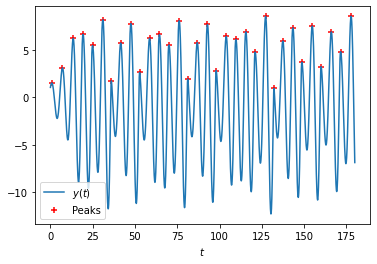

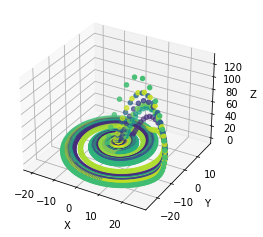

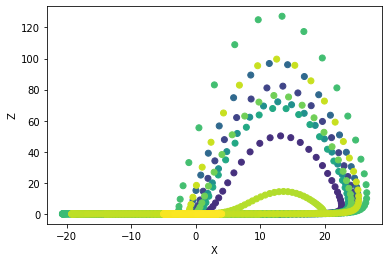

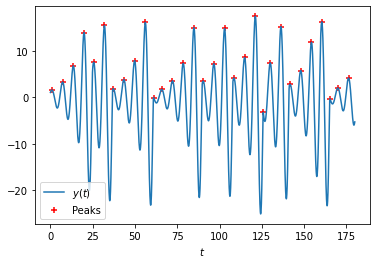

In [4]:
import os
os.system('mkdir -p build')
T = 180
make_plot(5.7, T=T)
make_plot(6, T=T)
make_plot(14, T=T)